In [1]:
import pickle
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import shapely

In [2]:
 with open('../geodata.txt', "rb") as fp:   # Unpickling
        data_list = pickle.load(fp)
        
# list_dataframes[x][0] = entidad dataframe
# list_dataframes[x][1] = manzana dataframe


In [3]:
data_list[0][0].head()

,MANZENT_I,TOTAL_PERS,geometry
0,1101092901901,30,(POLYGON ((-70.05040897699996 -21.427667070999...
1,1101092021041,14,POLYGON ((-70.14891894999994 -21.0102753829999...
2,1101092021045,16,POLYGON ((-70.17176999999998 -21.0127199999999...
3,1101092021048,131,POLYGON ((-70.13977348899994 -20.9710522339999...
4,1101092021047,5,POLYGON ((-70.06673145899998 -21.0194976639999...


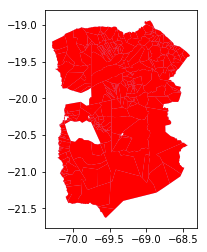

In [4]:
base = data_list[0][0]['geometry'].plot(color='b', alpha=0.3)
data_list[0][0]['geometry'].plot(ax=base, color='r')

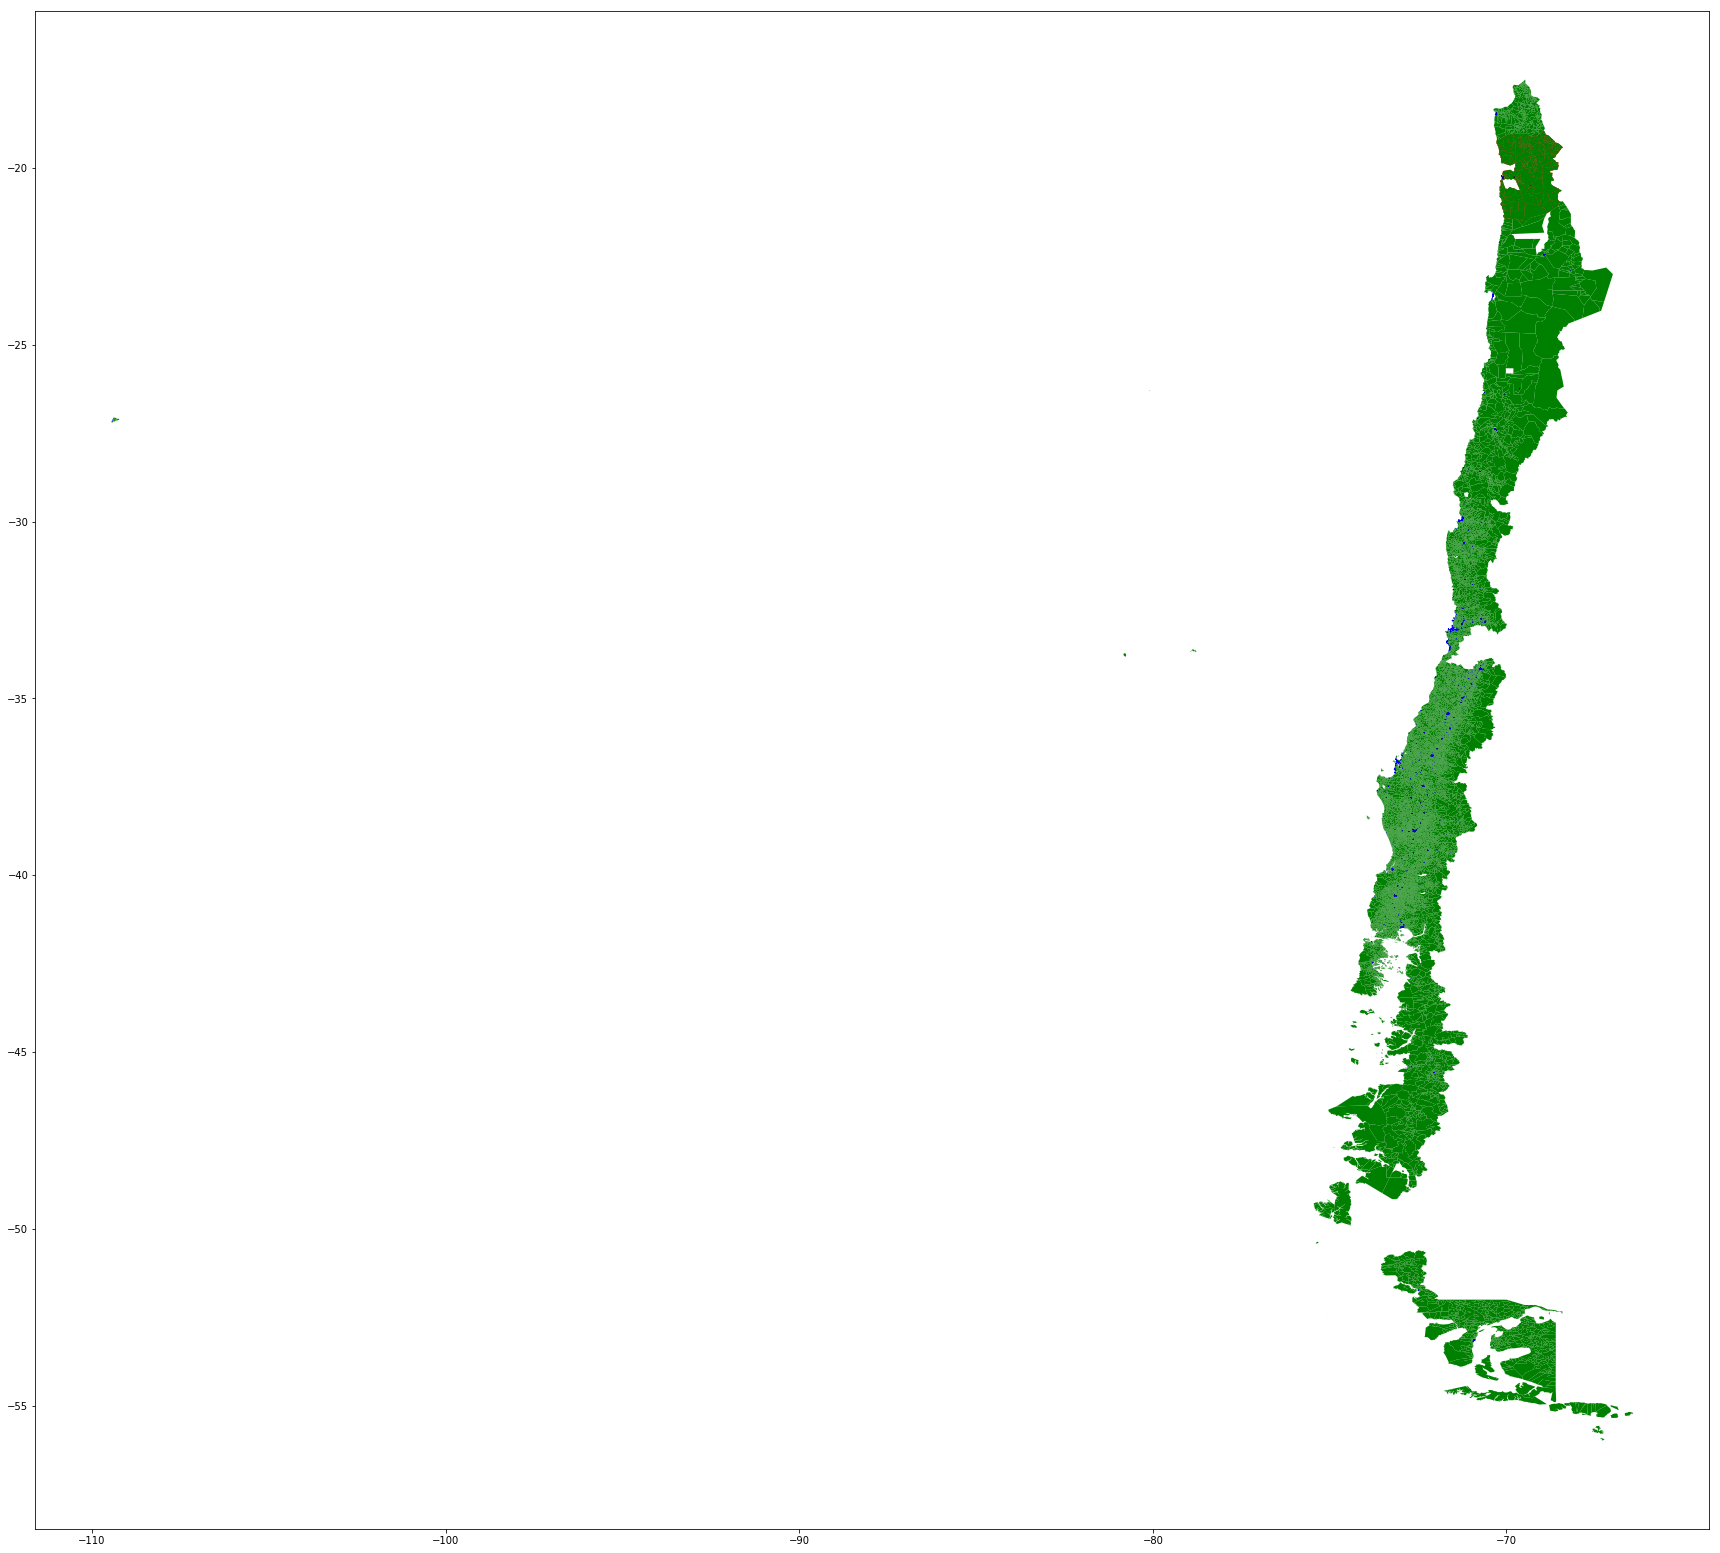

In [5]:
i=0
base = data_list[0][0]['geometry'].plot(color='r', figsize=(30,30))
for region in range(len(data_list)):
    
    added = data_list[i][0]['geometry'].plot(ax=base, color='g')
    i+=1
    
    
i=0
for region in range(len(data_list)):
    
    total = data_list[i][1]['geometry'].plot(ax=added, color='b')
    i+=1

total.plot();

## Creating a new df with all the data

In [6]:
# Merging dfs
i=1

df_geografico = pd.concat([data_list[0][0], data_list[0][1]], ignore_index=True)

for region in range(len(data_list)-1):
    
    df_geografico = pd.concat([df_geografico,data_list[i][0], data_list[i][1] ], ignore_index=True)
    i+=1
    
df_geografico.head()    

,MANZENT_I,TOTAL_PERS,geometry
0,1101092901901,30,(POLYGON ((-70.05040897699996 -21.427667070999...
1,1101092021041,14,POLYGON ((-70.14891894999994 -21.0102753829999...
2,1101092021045,16,POLYGON ((-70.17176999999998 -21.0127199999999...
3,1101092021048,131,POLYGON ((-70.13977348899994 -20.9710522339999...
4,1101092021047,5,POLYGON ((-70.06673145899998 -21.0194976639999...


In [7]:
len(data_list)

14

## Loading Censo2017 cleaned dataset

In [8]:
censo2017 = pd.read_csv('../../Output_censo.csv')

In [9]:
censo2017.head()

,AREA,DC,ZONA_LOCALIDAD,MANZANA_ENTIDAD,ID_ZONA_LOCALIDAD,ID_MANZANA_ENTIDAD,PERSONAS_CENSADAS,HOMBRES,MUJERES,EDAD_0A5,...,INMIGRANTES,PUEBLO_INDIGENA,VIVIENDA_PARTICULAR,VIVIENDA_COLECTIVA,VPOMP,TOTAL_VIVIENDAS,NOMBRE_REGION,NOM_PROVINCIA,NOM_COMUNA,NOM_AREA
0,1,1,1,1,7849,1101011001001,15,NaN,NaN,0.0,...,0.0,0.0,1,2,0,3,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO
1,1,1,1,10,7849,1101011001010,70,38.0,32.0,NaN,...,12.0,13.0,17,1,15,18,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO
2,1,1,1,11,7849,1101011001011,36,21.0,15.0,NaN,...,11.0,7.0,15,1,15,16,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO
3,1,1,1,12,7849,1101011001012,65,34.0,31.0,NaN,...,27.0,4.0,24,0,24,24,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO
4,1,1,1,13,7849,1101011001013,39,12.0,27.0,NaN,...,4.0,17.0,11,2,9,13,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO


In [10]:
df_geografico.head()

,MANZENT_I,TOTAL_PERS,geometry
0,1101092901901,30,(POLYGON ((-70.05040897699996 -21.427667070999...
1,1101092021041,14,POLYGON ((-70.14891894999994 -21.0102753829999...
2,1101092021045,16,POLYGON ((-70.17176999999998 -21.0127199999999...
3,1101092021048,131,POLYGON ((-70.13977348899994 -20.9710522339999...
4,1101092021047,5,POLYGON ((-70.06673145899998 -21.0194976639999...


In [11]:
df_geografico['MANZENT_I'] = pd.to_numeric(df_geografico['MANZENT_I'])

In [12]:
df_geografico.set_index('MANZENT_I', inplace=True)

In [13]:
censo2017.set_index('ID_MANZANA_ENTIDAD', inplace=True)

In [14]:
type(df_geografico.index[0])

numpy.int64

In [15]:
type(censo2017.index[0])

numpy.int64

## Merging dataframes

In [23]:
df = censo2017.join(df_geografico, how='left')

In [18]:
df.reset_index(inplace=True)

#### Drop NANs

In [24]:
df.dropna(subset=['geometry'], inplace=True)

In [25]:
df.shape

(129099, 24)

In [26]:
pd.isna(df['geometry']).sum()

0

In [27]:
pd.isna(df['TOTAL_PERS']).sum()

0

## Save it to a csv file

In [23]:
df.to_csv('../Censo2017_final.csv', index=False)

In [28]:
geo_df = geopandas.GeoDataFrame(df)

In [64]:
geo_df

,AREA,DC,ZONA_LOCALIDAD,MANZANA_ENTIDAD,ID_ZONA_LOCALIDAD,PERSONAS_CENSADAS,HOMBRES,MUJERES,EDAD_0A5,EDAD_6A14,...,VIVIENDA_PARTICULAR,VIVIENDA_COLECTIVA,VPOMP,TOTAL_VIVIENDAS,NOMBRE_REGION,NOM_PROVINCIA,NOM_COMUNA,NOM_AREA,TOTAL_PERS,geometry
ID_MANZANA_ENTIDAD,,,,,,,,,,,,,,,,,,,,,
1101011001001,1,1,1,1,7849,15,NaN,NaN,0.0,0.0,...,1,2,0,3,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO,15.0,POLYGON ((-70.15837384297845 -20.2031002760568...
1101011001010,1,1,1,10,7849,70,38.0,32.0,NaN,NaN,...,17,1,15,18,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO,70.0,POLYGON ((-70.15373695289804 -20.2146701369172...
1101011001011,1,1,1,11,7849,36,21.0,15.0,NaN,0.0,...,15,1,15,16,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO,36.0,POLYGON ((-70.15453938108755 -20.2142637971364...
1101011001012,1,1,1,12,7849,65,34.0,31.0,NaN,7.0,...,24,0,24,24,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO,65.0,POLYGON ((-70.15481738671298 -20.2148420207425...
1101011001013,1,1,1,13,7849,39,12.0,27.0,NaN,NaN,...,11,2,9,13,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO,39.0,POLYGON ((-70.15404927755208 -20.2152689172266...
1101011001014,1,1,1,14,7849,160,69.0,91.0,18.0,17.0,...,75,0,62,75,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO,160.0,POLYGON ((-70.15294678516597 -20.2158187132629...
1101011001015,1,1,1,15,7849,19,NaN,NaN,NaN,NaN,...,8,0,7,8,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO,19.0,POLYGON ((-70.15298531212244 -20.2166958553294...
1101011001016,1,1,1,16,7849,456,223.0,233.0,39.0,47.0,...,213,0,163,213,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO,456.0,POLYGON ((-70.15326457679873 -20.2165750296138...
1101011001017,1,1,1,17,7849,203,111.0,92.0,18.0,26.0,...,100,1,80,101,TARAPACÁ,IQUIQUE,IQUIQUE,URBANO,203.0,POLYGON ((-70.15448168957829 -20.2160445357267...


In [65]:
geo_df_reduced = geo_df[['NOM_COMUNA','PERSONAS_CENSADAS', 'geometry']]#, 'TOTAL_PERS']]

### Aggregating

#### There are polygons not valid for graphic visualization, for validating then we will use the buffer method.

In [70]:
for i in range(len(geo_df_reduced['geometry'])):
    if geo_df_reduced['geometry'].iloc[i].is_valid == False:
        geo_df_reduced['geometry'].iloc[i] = geo_df_reduced['geometry'].iloc[i].buffer(0)
        print('No valid in line %i' %i)

C:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


No valid in line 12111
No valid in line 14478
No valid in line 32920
No valid in line 105001
No valid in line 113475
No valid in line 115184
No valid in line 119106
No valid in line 119916
No valid in line 120154
No valid in line 120221
No valid in line 121286
No valid in line 121464
No valid in line 121498
No valid in line 125648
No valid in line 126866
No valid in line 127190
No valid in line 127406
No valid in line 128071


In [37]:
def alfonso (x):
    return x.unary_union

In [71]:
df2=geo_df_reduced.groupby('NOM_COMUNA')
df_grouped = df2.agg({'geometry':alfonso, 'PERSONAS_CENSADAS':'sum'})
df_grouped.head()

# Same order as:
# geo_df_reduced.dissolve(by='NOM_COMUNA', aggfunc=)

,geometry,PERSONAS_CENSADAS
NOM_COMUNA,,
ALGARROBO,(POLYGON ((-71.6591886644253 -33.3590664088876...,13798
ALTO BIOBÍO,POLYGON ((-71.38749103999999 -38.0933750369999...,5823
ALTO DEL CARMEN,POLYGON ((-70.02103964999998 -29.3300598269999...,5281
ALTO HOSPICIO,(POLYGON ((-70.11137571261901 -20.301423680558...,106298
ANCUD,(POLYGON ((-74.05316234199995 -42.098917142999...,38849


## Geoplotting

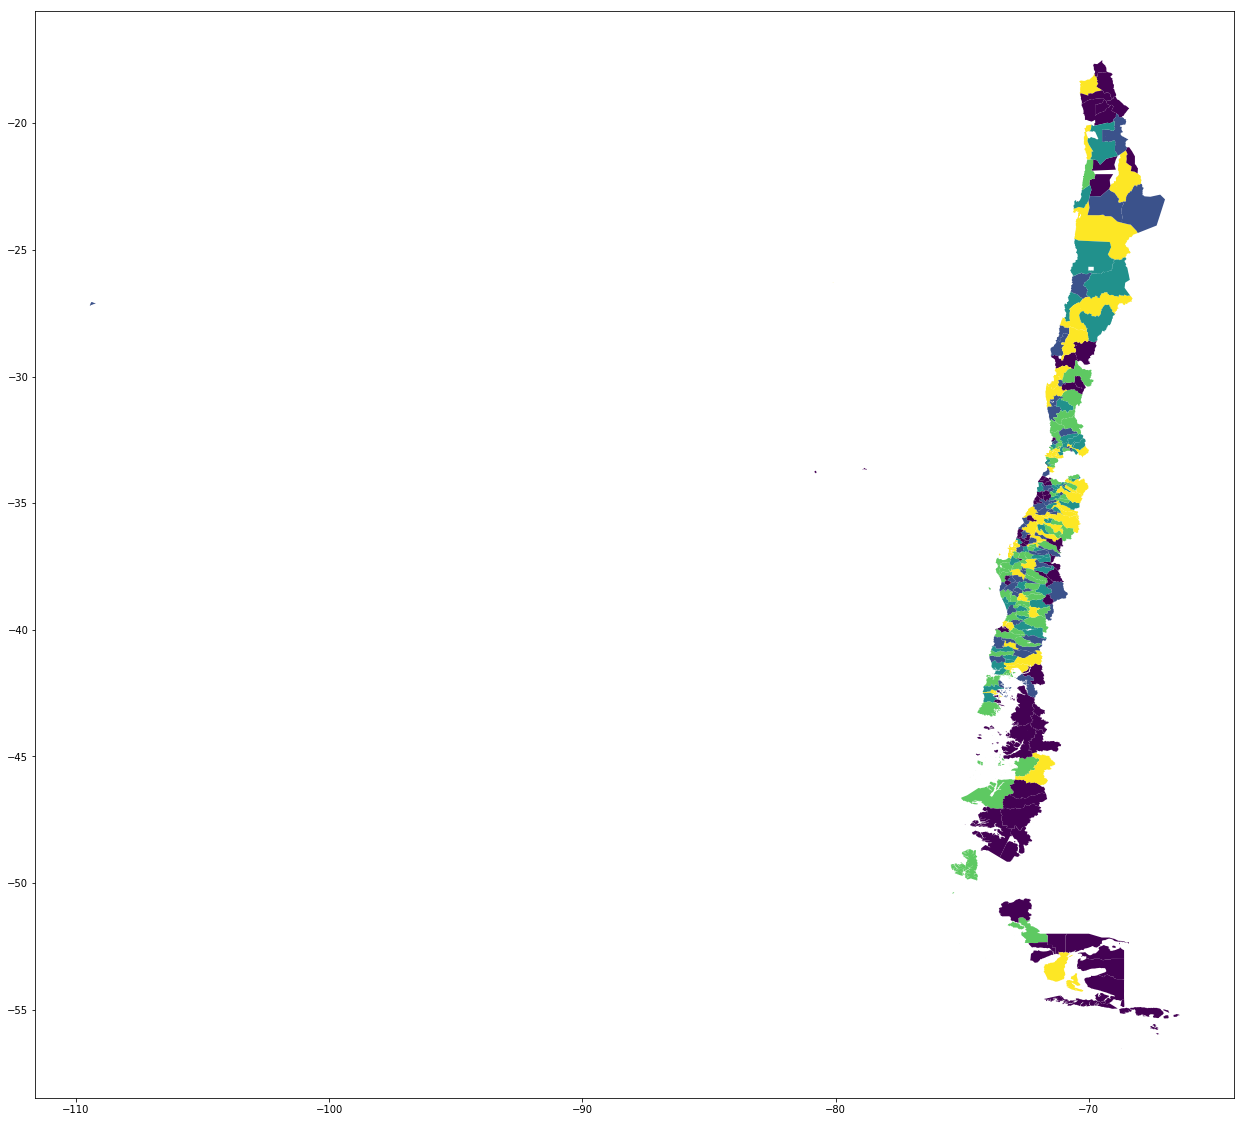

In [78]:
geopandas.GeoDataFrame(df_grouped).plot(column='PERSONAS_CENSADAS' , cmap='viridis' ,figsize=(25,20), scheme='quantiles')

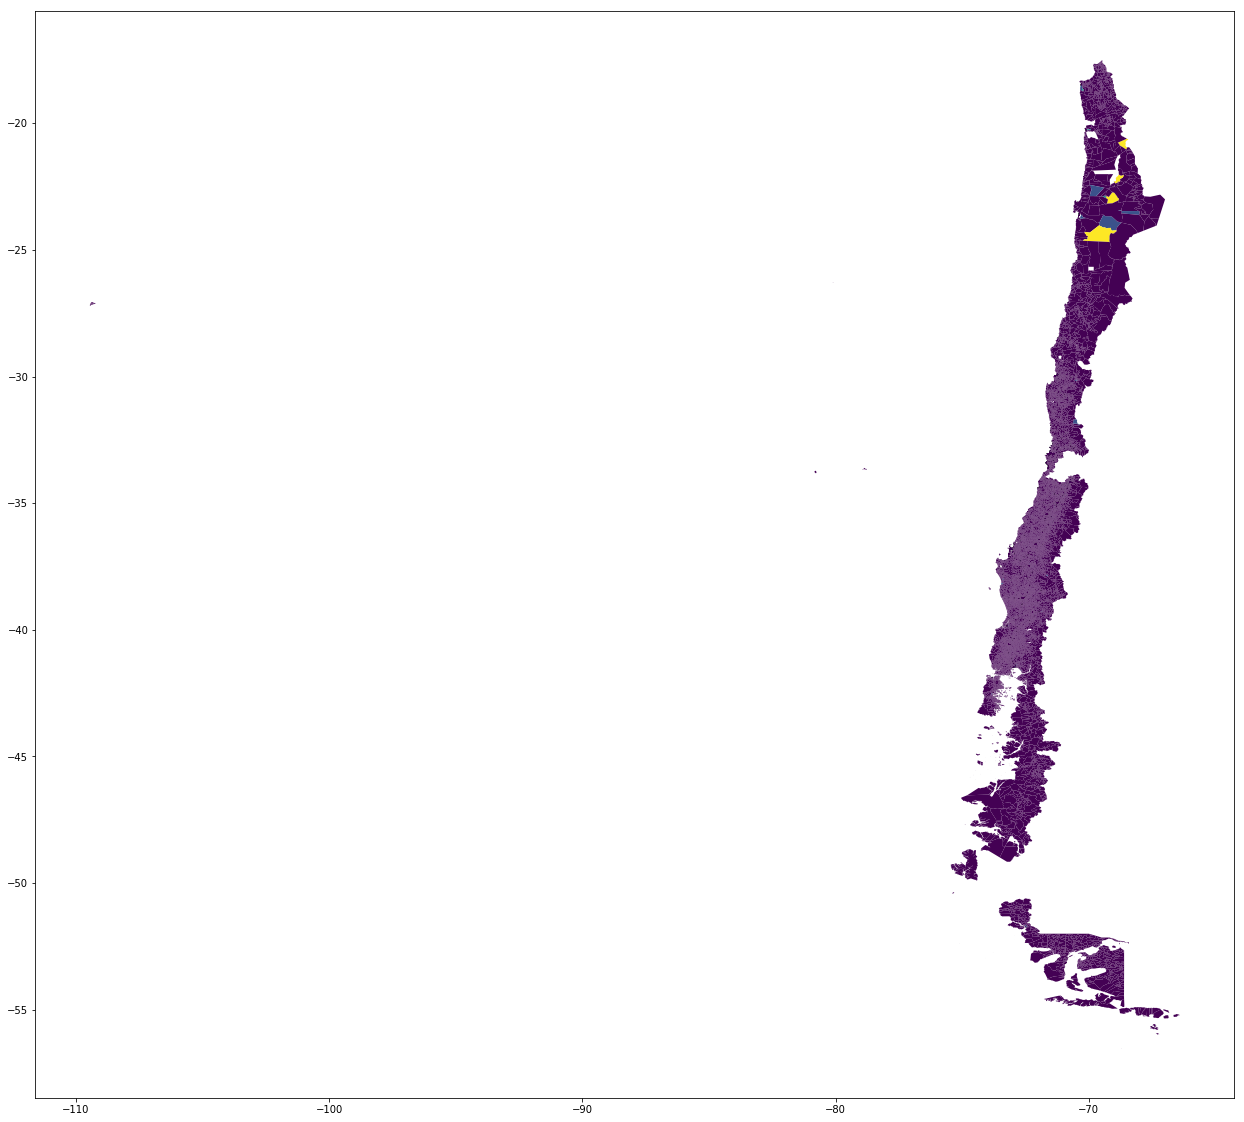

In [79]:
geo_df.plot(column='PERSONAS_CENSADAS',cmap='viridis' ,figsize=(25,20), scheme='equal_interval')

### Extra trials

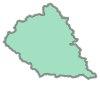

In [140]:
df_grouped['geometry'].iloc[1]

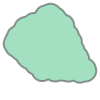

In [107]:
df_grouped['geometry'].iloc[1].buffer(0.1)

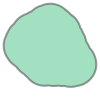

In [109]:
df_grouped['geometry'].iloc[1].buffer(0.3)

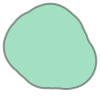

In [110]:
df_grouped['geometry'].iloc[1].buffer(0.5)

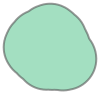

In [111]:
df_grouped['geometry'].iloc[1].buffer(0.7)

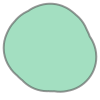

In [112]:
df_grouped['geometry'].iloc[1].buffer(1)

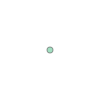

In [116]:
df_grouped['geometry'].iloc[1].centroid

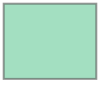

In [117]:
df_grouped['geometry'].iloc[1].envelope

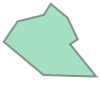

In [143]:
df_grouped['geometry'].iloc[1].simplify(tolerance=0.05)

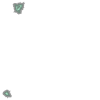

In [121]:
geopandas.GeoSeries(df_grouped['geometry'].iloc[1:3]).unary_union

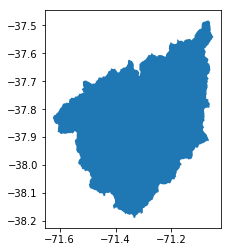

In [149]:
geopandas.GeoSeries(df_grouped['geometry'].iloc[1]).rotate(angle=90).plot()

In [150]:
df_grouped['geometry'].iloc[1].area

0.21748666025730745